linear regression

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.4.0


In [0]:
# dataset


num_inputs = 2
num_examples = 1000

true_w = [2,-3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)



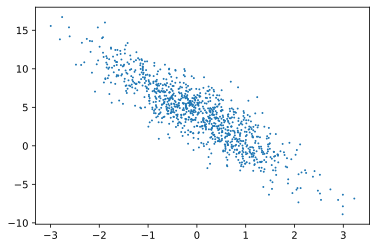

In [4]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()

set_figsize()
plt.scatter(features[:,1].numpy(), labels.numpy(),1)


In [0]:
# read the dataset

def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
    yield features.index_select(0,j),labels.index_select(0,j)


In [8]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
  print(X,'\n',y)
  break

tensor([[ 1.8513,  0.2355],
        [-0.0181,  0.3799],
        [-1.5407, -0.8006],
        [-1.9544, -1.5147],
        [ 0.7174, -0.3491],
        [ 1.5527, -1.2047],
        [ 0.3670, -0.1174],
        [ 0.5572,  0.2778],
        [ 0.3012,  0.4409],
        [ 1.5458,  0.7160]]) 
 tensor([ 7.0983,  2.8751,  3.8270,  5.4529,  6.8095, 11.3746,  5.3268,  4.3447,
         3.2853,  4.8634])


In [10]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype = torch.float32)
b = torch.zeros(1,dtype = torch.float32)

w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)


tensor([0.], requires_grad=True)

In [0]:
# definit linear

def linreg(X, w, b):
  return torch.mm(X,w)+b


In [0]:
# definit loss function

def squared_loss(y_hat, y):  
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [0]:
# definit optimizer  gradient descent

def sgd(params, lr, batch_size):  
    for param in params:
        param.data -= lr * param.grad / batch_size 

In [15]:
# train

lr = 0.03
num_epochs = 5


net = linreg
loss = squared_loss

for epoch in range(num_epochs): 
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  
        l.backward()  
        sgd([w, b], lr, batch_size)  
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.034785
epoch 2, loss 0.000140
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000052


In [16]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9994],
        [-3.4008]], requires_grad=True)
4.2 
 tensor([4.1996], requires_grad=True)




# pytorch 间接实现 

In [17]:
import torch 
from torch import nn
import numpy as np

torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')


1.4.0


In [0]:
# dataset

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [0]:
import torch.utils.data as Data

batch_size = 10


dataset = Data.TensorDataset(features, labels)


data_iter = Data.DataLoader(
    dataset=dataset,            # torch TensorDataset format
    batch_size=batch_size,      # mini batch size
    shuffle=True,               # shuffle the data 
    num_workers=2,              
)

In [20]:
for X, y in data_iter:
    print(X, '\n', y)
    break

tensor([[ 0.1668,  0.6254],
        [ 1.2719, -0.9646],
        [-0.4149, -0.3938],
        [-1.5484, -0.2870],
        [ 0.5561, -0.2293],
        [ 0.8764,  0.6491],
        [ 0.7525, -2.2570],
        [ 2.7187, -0.7883],
        [ 1.7392, -1.0772],
        [-0.0511,  0.4579]]) 
 tensor([ 2.3974, 10.0143,  4.7126,  2.0719,  6.1077,  3.7350, 13.3651, 12.3170,
        11.3548,  2.5365])


In [21]:
# definit the linearnet model


class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net) 

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [22]:
# method 1
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # ......
    )

# method 2
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# method 3
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [23]:
# 

from torch.nn import init

init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0) 

for param in net.parameters():
    print(param)



Parameter containing:
tensor([[-0.0142, -0.0161]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [0]:
# loss function

loss = nn.MSELoss()

In [25]:
# optimizer gradient descent


import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [26]:
# train

num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 0.000406
epoch 2, loss: 0.000066
epoch 3, loss: 0.000064


In [27]:
dense = net[0]
print(true_w, dense.weight.data)
print(true_b, dense.bias.data)

[2, -3.4] tensor([[ 2.0003, -3.3995]])
4.2 tensor([4.2000])
